# K-means Clustering Project

**Goal**: attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

**Remark**: There's actually the label for this data set, but WON'T be used for the KMeans clustering algorithm, since that is an unsupervised learning algorithm. This algo is normally used when we don't have labels.

**Dataset**:
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition (higher rate of tuition that public universities and colleges in the United States often charge to students who are not residents of the state where the institution is located)
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree (highest academic degree awarded in a field of study. In many fields, this is a Ph.D.)
* S.F.Ratio: Student/faculty ratio (average number of students per faculty member as an indicator of the level of personal attention students might expect to receive)
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## Data Retrieval

In [137]:
# use university as index
df_unis = pd.read_csv('./filez/College_Data.csv', index_col=0)
df_unis.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [138]:
df_unis.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [139]:
df_unis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

## Exploratory Data Analysis

<Axes: xlabel='Grad.Rate', ylabel='Room.Board'>

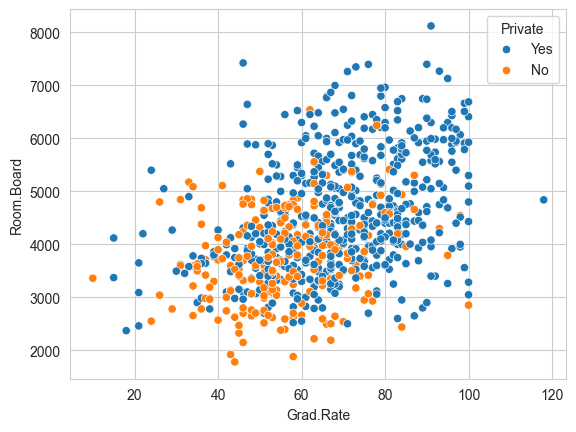

In [140]:
# show `Grad.Rate` vs. `Room.Board` with scatterplot by `Private`
sns.scatterplot(data=df_unis, x='Grad.Rate', y='Room.Board', hue='Private')

<Axes: xlabel='Outstate', ylabel='F.Undergrad'>

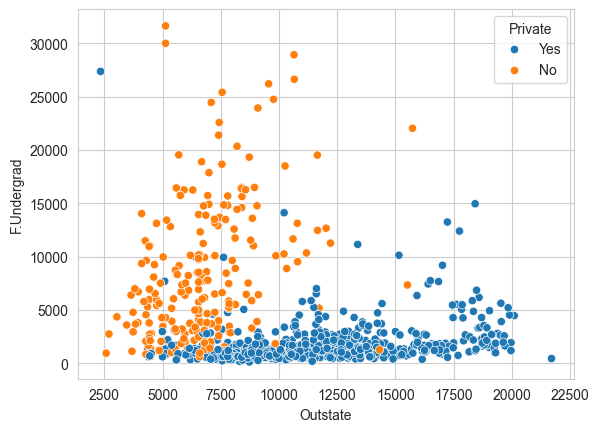

In [141]:
# show `F.Undergrad` vs. `Outstate` with scatterplot by `Private`
sns.scatterplot(data=df_unis, x='Outstate', y='F.Undergrad', hue='Private')

<Axes: xlabel='Outstate', ylabel='Count'>

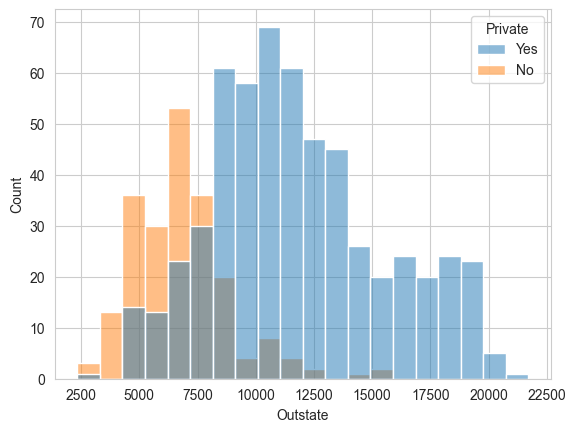

In [142]:
# show staked outstate in histogram by private
sns.histplot(data=df_unis, x='Outstate', hue='Private', bins=20)

<Axes: xlabel='Grad.Rate', ylabel='Count'>

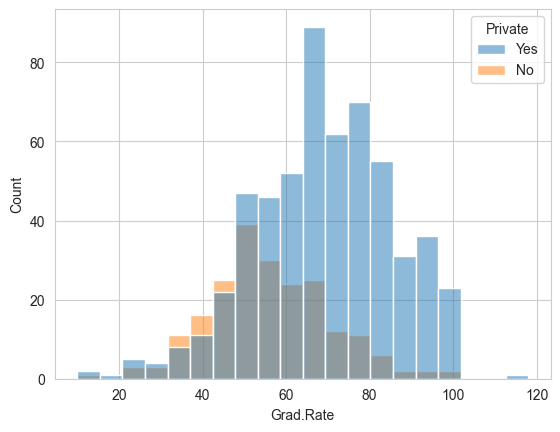

In [143]:
# show staked Grad.Rate in histogram by private
sns.histplot(data=df_unis, x='Grad.Rate', hue='Private', bins=20)

In [144]:
# show the school with a graduation rate of higher than 100% (error):
df_unis[df_unis['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [145]:
# update the incorrect graduation rate for that university
df_unis.loc[df_unis['Grad.Rate'] > 100, 'Grad.Rate'] = 100


<Axes: xlabel='Grad.Rate', ylabel='Count'>

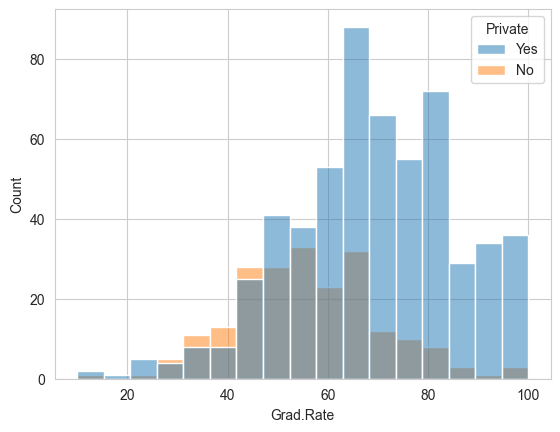

In [146]:
# show staked Grad.Rate in histogram by private (without the error)
sns.histplot(data=df_unis, x='Grad.Rate', hue='Private')

## K-means Clustering Creation

In [147]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(df_unis.drop(['Private'], axis=1))
kmeans.get_params()


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [148]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

## Evaluation

In [149]:
# Create a new column `Cluster`, which is 0 or 1 depending on the field `Private`
df_unis['Cluster'] = df_unis['Private'].apply(lambda x: 1 if x == 'Yes' else 0)
df_unis.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1


In [150]:
from sklearn.model_selection import train_test_split

X = df_unis.drop(['Private', 'Cluster'], axis=1)
y = df_unis['Cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

In [151]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = kmeans.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 22  36]
 [ 13 163]]
              precision    recall  f1-score   support

           0       0.63      0.38      0.47        58
           1       0.82      0.93      0.87       176

    accuracy                           0.79       234
   macro avg       0.72      0.65      0.67       234
weighted avg       0.77      0.79      0.77       234

